# To build a model for training and testing:

In [1]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir_name_train_COVID19 = 'Data/train/COVID19'
dir_name_train_PNEUMONIA = 'Data/train/PNEUMONIA'

dir_name_train_NORMAL = 'Data/train/NORMAL'




In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for COVID19 type disease:

 ====== Images in:  Data/train/COVID19
images_count:	460
min_width:	224
max_width:	4757
min_height:	224
max_height:	4757



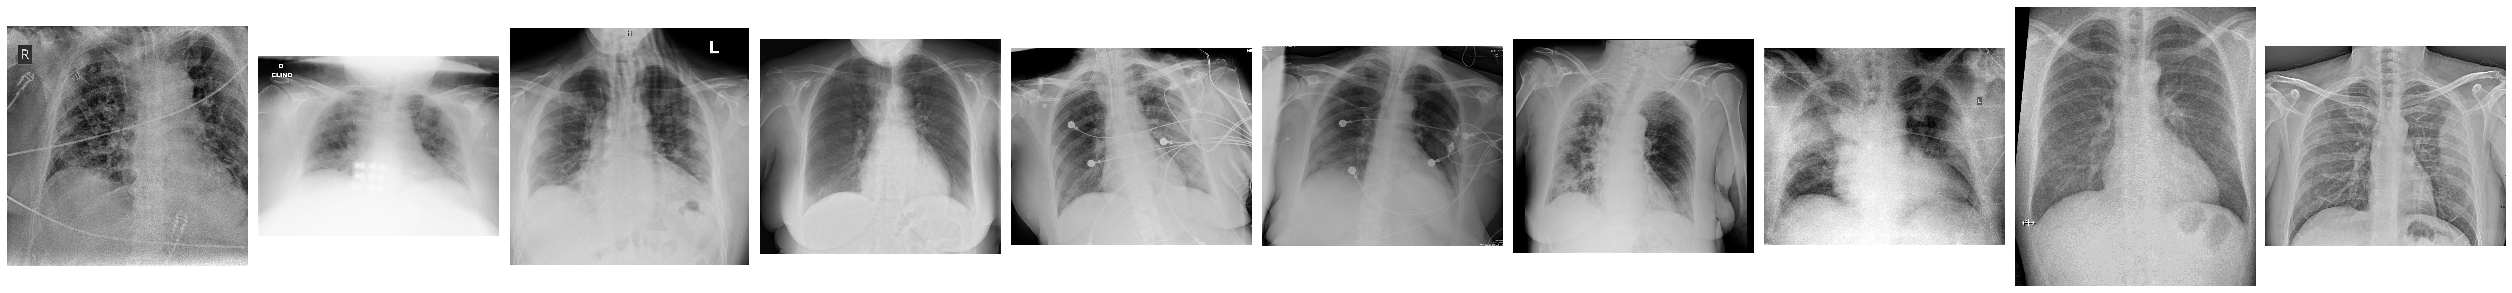

In [7]:
print("")
print("Trainned data for COVID19 type disease:")
print("")
Images_details(dir_name_train_COVID19)
print("")
plot_images(dir_name_train_COVID19, 10)


Trainned data for PNEUMONIA:

 ====== Images in:  Data/train/PNEUMONIA
images_count:	517
min_width:	502
max_width:	1944
min_height:	307
max_height:	1944



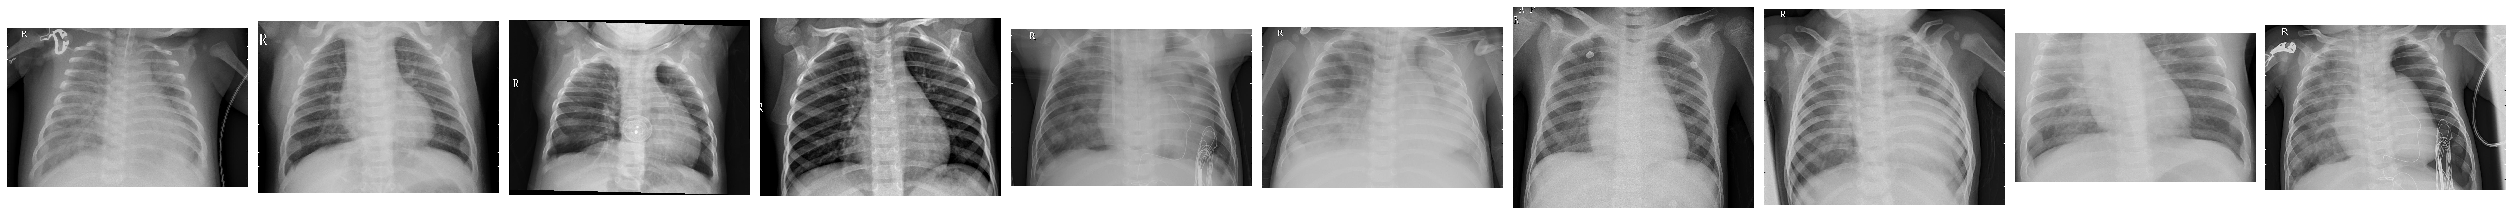

In [8]:
print("")
print("Trainned data for PNEUMONIA:")
print("")
Images_details(dir_name_train_PNEUMONIA)
print("")
plot_images(dir_name_train_PNEUMONIA, 10)


Trainned data for dir_name_train_NORMAL:

 ====== Images in:  Data/train/NORMAL
images_count:	471
min_width:	993
max_width:	2534
min_height:	617
max_height:	2534



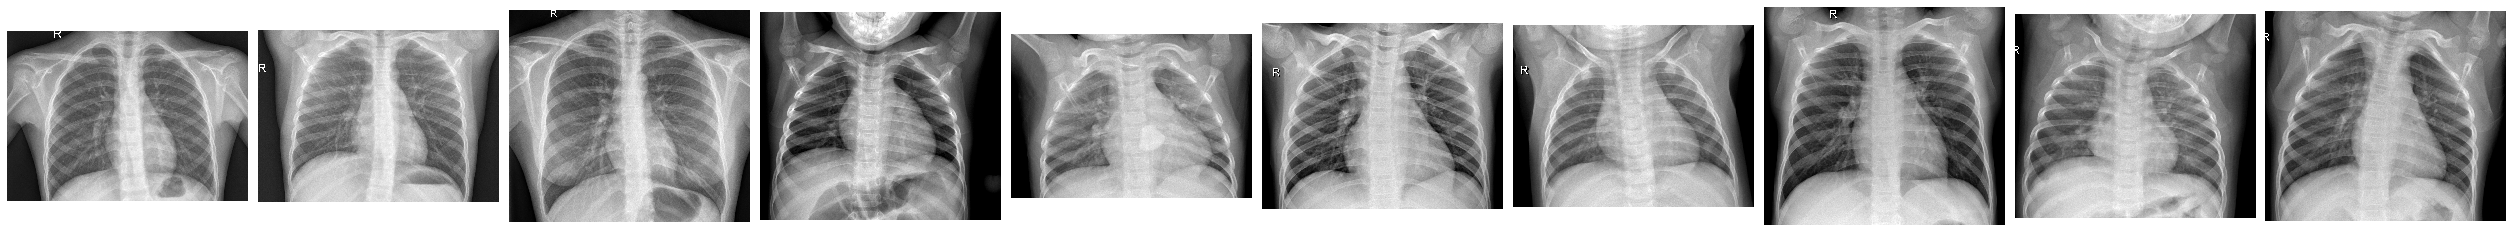

In [9]:
print("")
print("Trainned data for dir_name_train_NORMAL:")
print("")
Images_details(dir_name_train_NORMAL)
print("")
plot_images(dir_name_train_NORMAL, 10)

In [10]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [11]:
Classifier.add(Dense(3, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1448 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [14]:
img_dims = 150
epochs = 5
batch_size = 32

In [15]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 45 steps, validate for 40 steps
Epoch 1/5
45/45 [==============================] - 64s 1s/step - loss: 2.6084 - accuracy: 0.4527 - Precision: 0.5104 - Recall: 0.3475 - TruePositives: 492.0000 - TrueNegatives: 2360.0000 - FalsePositives: 472.0000 - FalseNegatives: 924.0000 - val_loss: 0.9965 - val_accuracy: 0.3250 - val_Precision: 0.5000 - val_Recall: 0.3055 - val_TruePositives: 391.0000 - val_TrueNegatives: 2169.0000 - val_FalsePositives: 391.0000 - val_FalseNegatives: 889.0000
Epoch 2/5
45/45 [==============================] - 62s 1s/step - loss: 0.9175 - accuracy: 0.5523 - Precision: 0.6475 - Recall: 0.4386 - TruePositives: 621.0000 - TrueNegatives: 2494.0000 - FalsePositives: 338.0000 - FalseNegatives: 795.0000 - val_loss: 0.8854 - val_accuracy: 0.4836 - val_Precision: 0.5574 - val_Recall: 0.3070 - val_TruePositives: 393.0000 - val_TrueNegatives: 22

In [16]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

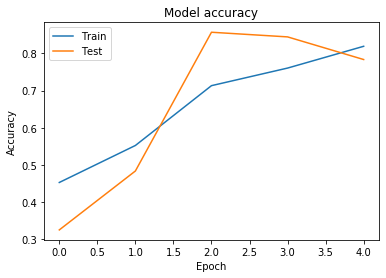

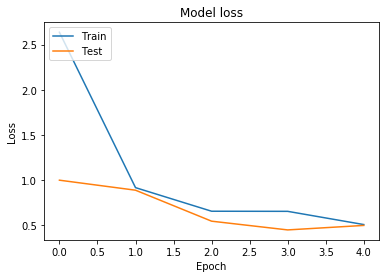

In [17]:
graph()

In [18]:
print("[INFO] Calculating model accuracy")
scores = Classifier.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
  ...
    to  
  ['...']
41/41 [==============================] - 23s 559ms/step - loss: 0.4976 - accuracy: 0.7826 - Precision: 0.7928 - Recall: 0.7694 - TruePositives: 991.0000 - TrueNegatives: 2317.0000 - FalsePositives: 259.0000 - FalseNegatives: 297.0000
Test Accuracy: 78.2608687877655
